### Meta factorial analysis: does parental age affect the telomere length of wild animals?


##### data descriptions: Sparrow weaver dataset
1. Number of variables: 19

2. Number of cases/rows: 765

3. Variable List

- RTL: relative telomere length measured by qPCR is a biomarker for physiological aging.
- DNA.ID: unique code for each individual blood sample
- DNA.DATE: the date the blood sample was taken
- SAMPLING.PERIOD: 
	a factor identifying (i) the breeding season (which runs from October to April inclusive) in which the blood sample was collected (e.g. 2009/10, 2010/11, 2011/12) 
	and (ii) whether the sample was taken "early" (September to December) or "late" (January to May) in the breeding season.
	For example, "0910L" indicates the sample was taken "Late" in the 2009/10 season (i.e. between January and May 2010).
	Factor levels of this variable: 0910L, 1011E, 1011L, 1112E, 1112L, 1213E, 1213L, 1314E, 1314L, 1415E, 1415L
- PCR.PLATE.ID: ID of the PCR plate on which the sample was run.
- ID: ID of the sampled bird
- SEX: F for female, M for male
- BIRTH.CLUTCH: ID of the clutch in which the sampled bird hatched.
- AGE.CLASS: Factor identifying the age (in days) of the bird at sampling. Factor levels of this variable: 0-10 days, 11-89 days, 90+ days
- MOTHER.ID: ID of the mother of the sampled bird.
- MATERNAL.AGE.DAYS: estimated age of the mother (in days) at the lay date of the sampled bird's birth clutch. 
- MATERNAL.MEAN.AGE.DAYS: the mother's mean age (in days) across all sampled clutches for that individual mother.
- MATERNAL.DELTA.AGE.DAYS: the difference (in days) between maternal age (MATERNAL.AGE.DAYS) and maternal mean age (MATERNAL.MEAN.AGE.DAYS). 
			Calculated as MATERNAL.AGE.DAYS minus MATERNAL.MEAN.AGE.DAYS.
- FATHER.ID: ID of the father of the sampled bird.
- PATERNAL.AGE.DAYS: estimated age of the father (in days) at the lay date of the sampled bird's birth clutch.
- PATERNAL.MEAN.AGE.DAYS: the father's mean age (in days) across all sampled clutches for that individual father.
- PATERNAL.DELTA.AGE.DAYS: the difference (in days) between paternal age (PATERNAL.AGE.DAYS) and paternal mean age (PATERNAL.MEAN.AGE.DAYS). 
			Calculated as PATERNAL.AGE.DAYS minus PATERNAL.MEAN.AGE.DAYS.
- DNA.EXTRACTION.DATE: the date that DNA was extracted from the blood sample.
- SAMPLE.STORAGE.DURATION.DAYS: the length of time (in days) the blood sample was stored in ethanol before DNA extraction.

Source: https://zenodo.org/record/5646557#.Y7g1GtLMKEI


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# from pycaret.classification import *

# from sklearn.metrics import *
# import scikitplot as skplt

df = pd.read_csv(r'data/data2_dryad_telomere_data.csv')
df.head()

: 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RTL                           765 non-null    float64
 1   DNA.ID                        765 non-null    int64  
 2   DNA.DATE                      765 non-null    object 
 3   SAMPLING.PERIOD               765 non-null    object 
 4   PCR.PLATE                     765 non-null    object 
 5   ID                            765 non-null    object 
 6   SEX                           765 non-null    object 
 7   BIRTH.CLUTCH                  765 non-null    object 
 8   AGE.CLASS                     765 non-null    object 
 9   MOTHER.ID                     765 non-null    object 
 10  MATERNAL.AGE.DAYS             765 non-null    float64
 11  MATERNAL.MEAN.AGE.DAYS        765 non-null    float64
 12  MATERNAL.DELTA.AGE.DAYS       765 non-null    float64
 13  FATHE

### data exploration

In [18]:
df.describe()

,RTL,DNA.ID,MATERNAL.AGE.DAYS,MATERNAL.MEAN.AGE.DAYS,MATERNAL.DELTA.AGE.DAYS,PATERNAL.AGE.DAYS,PATERNAL.MEAN.AGE.DAYS,PATERNAL.DELTA.AGE.DAYS,SAMPLE.STORAGE.DURATION.DAYS
count,765.000000,765.000000,765.000000,765.000000,7.650000e+02,765.000000,765.000000,7.650000e+02,765.000000
mean,0.998933,1881.160784,1475.050980,1475.050980,-1.605219e-09,1513.359477,1513.359477,-2.922881e-09,799.942484
std,0.229495,697.751086,662.698899,415.300917,5.164252e+02,708.272835,456.495470,5.415370e+02,567.695006
min,0.428456,534.000000,317.000000,335.000000,-1.599292e+03,367.000000,413.833333,-1.958895e+03,63.000000
25%,0.842627,1344.000000,1054.500000,1126.333333,-2.755118e+02,1053.400000,1092.750000,-3.041667e+02,268.000000
50%,0.969682,1917.000000,1412.000000,1377.647059,0.000000e+00,1394.500000,1593.800000,0.000000e+00,612.000000
75%,1.143276,2520.000000,1879.500000,1831.718750,2.835238e+02,1981.750000,1816.454545,2.788182e+02,1207.000000
max,1.874313,2999.000000,2969.000000,2258.800000,1.593806e+03,2975.000000,2428.666667,1.532513e+03,2006.000000


In [19]:
df.shape

(765, 19)

In [20]:
dfage = df.astype({"AGE.CLASS":"str"})
# dfrtl = df.astype({"RTL": "str"})

df['RTL'] = df['RTL'].astype('float')
df['MATERNAL.MEAN.AGE.DAYS'] = df['MATERNAL.MEAN.AGE.DAYS'].astype('float')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   RTL                           765 non-null    float64
 1   DNA.ID                        765 non-null    int64  
 2   DNA.DATE                      765 non-null    object 
 3   SAMPLING.PERIOD               765 non-null    object 
 4   PCR.PLATE                     765 non-null    object 
 5   ID                            765 non-null    object 
 6   SEX                           765 non-null    object 
 7   BIRTH.CLUTCH                  765 non-null    object 
 8   AGE.CLASS                     765 non-null    object 
 9   MOTHER.ID                     765 non-null    object 
 10  MATERNAL.AGE.DAYS             765 non-null    float64
 11  MATERNAL.MEAN.AGE.DAYS        765 non-null    float64
 12  MATERNAL.DELTA.AGE.DAYS       765 non-null    float64
 13  FATHE

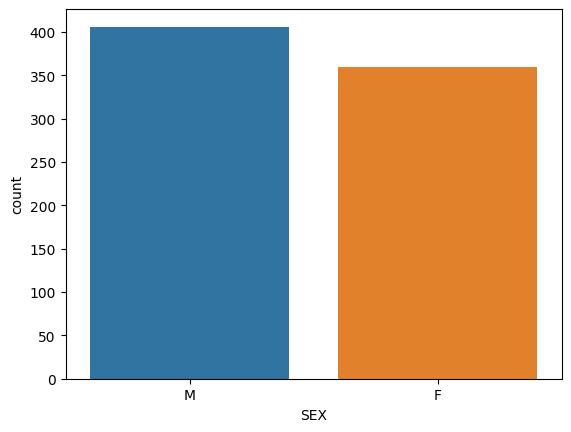

In [21]:
sexplt = sns.countplot(x = "SEX", data = df)

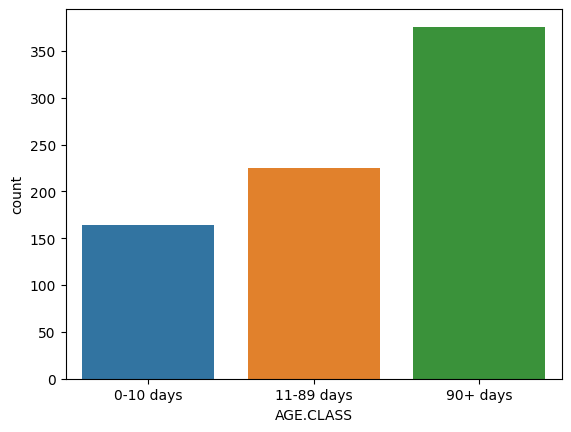

In [22]:
ageplt = sns.countplot(x = "AGE.CLASS", data = df)

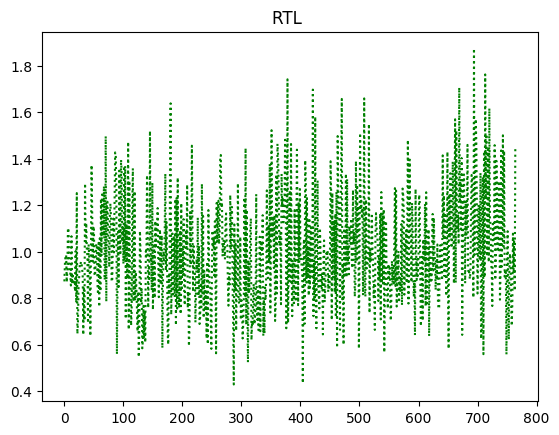

In [23]:
# The longer 

plt.plot(df["RTL"], linestyle = 'dotted', color = 'g')
plt.gca().set_title("RTL ")
plt.show()

Text(0.5, 1.0, "MATERNAL'S RTL AGAINST MEAN AGE IN DAYS")

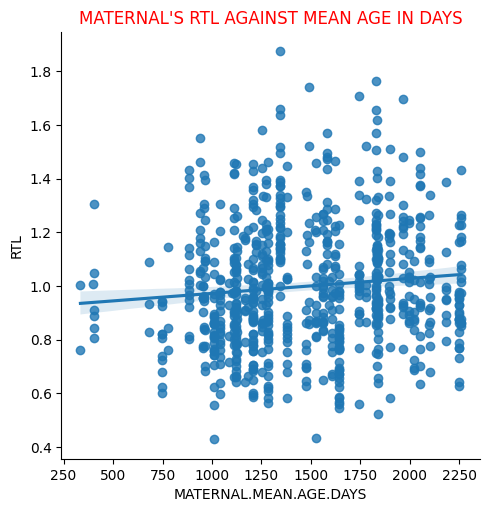

In [24]:
sns.lmplot(x="MATERNAL.MEAN.AGE.DAYS", y='RTL', data=df, fit_reg=True)
plt.gca().set_title("MATERNAL'S RTL AGAINST MEAN AGE IN DAYS", color = 'red')

Text(0.5, 1.0, "PATERNAL'S RTL AGAINST MEAN AGE IN DAYS")

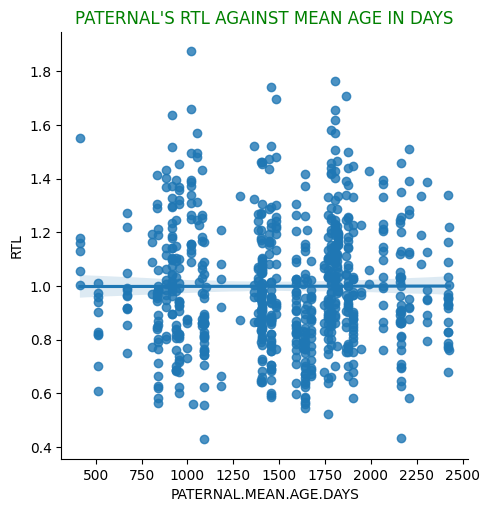

In [25]:
sns.lmplot(x="PATERNAL.MEAN.AGE.DAYS", y='RTL', data=df, fit_reg=True)
plt.gca().set_title("PATERNAL'S RTL AGAINST MEAN AGE IN DAYS", color = 'green')

### Create a linear regression model to predict telomere's length as a function of maternal's age

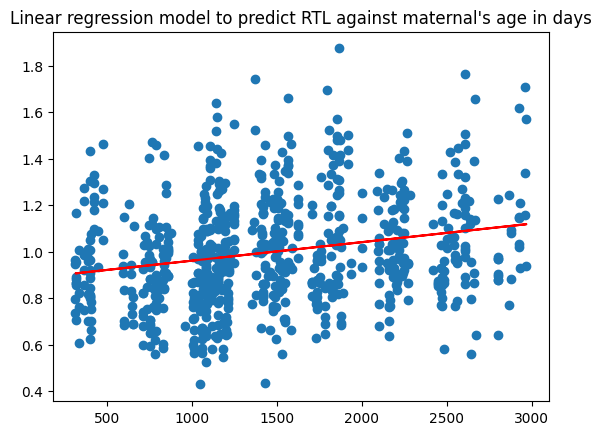

correlation = 0.2302716811493559, std error = 1.2200096429220074e-05, slope = 7.974377994149696e-05, intercept = 0.8813067639152621


In [26]:
# There is a small correlation that the older the maternla's age, the longer the telomeres are.

x = df["MATERNAL.AGE.DAYS"]
y = df["RTL"]
slope, intercept, r, p, std_err = stats.linregress(x, y)

def generate_linear_regression(x):
  return slope * x + intercept

linregmodel = list(map(generate_linear_regression, x))

plt.scatter(x, y)
plt.plot(x, linregmodel, color = "red")
plt.gca().set_title("Linear regression model to predict RTL against maternal's age in days")
plt.show()
print(f"correlation = {r}, std error = {std_err}, slope = {slope}, intercept = {intercept}")


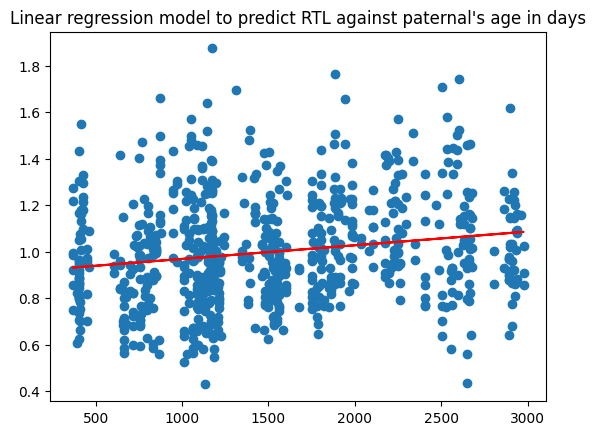

correlation = 0.18167682726626644, std error = 1.153510270254853e-05, slope = 5.88669435519415e-05, intercept = 0.9098460577841743


In [27]:
# Correlation is smaller when it comes to paternal's age to measure RTL.

x = df["PATERNAL.AGE.DAYS"]
y = df["RTL"]
slope, intercept, r, p, std_err = stats.linregress(x, y)

def generate_linear_regression(x):
  return slope * x + intercept

linregmodel = list(map(generate_linear_regression, x))

plt.scatter(x, y)
plt.plot(x, linregmodel, color = "red")
plt.gca().set_title("Linear regression model to predict RTL against paternal's age in days")
plt.show()
print(f"correlation = {r}, std error = {std_err}, slope = {slope}, intercept = {intercept}")